# Milestone 2 - Hypothesis Simulation
## Author: Emily McAfee
### Instructions
For Milestone 2 you should:

- explore the dataset by charts and summary statistics
- identify a likely distribution for several of the features
- computer basic summary statistics by both classical bootstrap, and Bayesian methods
- leverage confidence intervals in performing hypothesis tests to determin is the differences in pairs and multiple populations are significant

1. histograms/plots
2. likely distribution price/whatever/whatever
3. summary statistics by classical, bootstrap, and bayesian models
4. confidence intervals

## Explore housing dataset by charts and summary statistics

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
import warnings
warnings.filterwarnings
('ignore')
import scipy.stats as ss
import collections


In [2]:
# Load data
filename = "https://drive.google.com/uc?export=download&id=1TqcnKvPJnuuEMVZYpx2H-hOf5Kaw_LUu"

# Read .csv file in with pandas
housedata = pd.read_csv(filename, header = 0)

In [3]:
# Check data
print(housedata.dtypes)
print(housedata.loc[:,'bedrooms'].head())
housedata.loc[:, 'id'].head()
housedata.loc[:,'date'].head()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64


0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [4]:
# Summary statistics
housedata.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### What can we learn from these summary statistics?
First, let's start with *price* as that is very important to the seller. From the above summary statistics we can see the average price of a homein King County, WA is __$540,088.10__. On average, these house have __3 bedrooms__, __2 bathrooms__, and are anywhere from __1 to 2 floors__. This is extremely helpful to the developer, as it let's them know genrally what customers would be favoring in a home and can use this information for basic proposals and mock ups.

Just looking at the interquartile ranges (IQR) there don't appear to be any large descrpencies between them, but some exploratory data anlysis (EDA) will assist in having those patterns come through.

In [5]:
# Create frequency table of prices in zip codes
# Check data
sorted(set(housedata.loc[:,'zipcode'].unique()))

# Make column for counts
housedata['zipcounts'] = 1

# Show organized frequency table based on counts column
print(housedata[['zipcounts', 'zipcode']].groupby(['zipcode']).agg('count'))

# Show top ten
topzip = housedata[['zipcounts', 'zipcode']].groupby(['zipcode']).agg('count')

topzip.nlargest(10, 'zipcounts')


         zipcounts
zipcode           
98001          362
98002          199
98003          280
98004          317
98005          168
...            ...
98177          255
98178          262
98188          136
98198          280
98199          317

[70 rows x 1 columns]


,zipcounts
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
98042,548
98034,545
98118,508
98023,499


#### What can we learn from the frequency table?
Above are two frequency tables, one shows counts for all homes in their respective zip codes. The second, smaller, frequency table shows the top ten zip codes with the largest amount of houses. This could generate possible business insight by showing developers where there are already flourishing commuties. The opposite could also be done with frequency tables, showing the zipcodes with the least amount of houses.

Text(0, 0.5, 'Square feet')

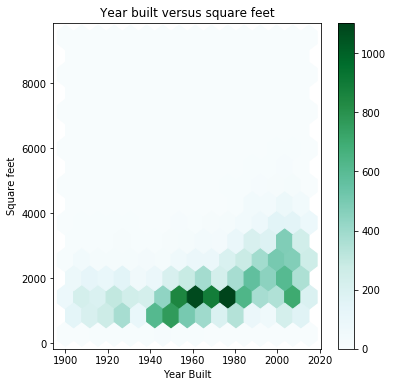

In [6]:
# Create hexbin of year built versus square feet
ax2 = plt.figure(figsize = (6, 6)).gca()
housedata.plot.hexbin(x = 'yr_built', y = 'sqft_above', gridsize = 15, ax = ax2)

ax2.set_title('Year built versus square feet')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Square feet')

#### What can we learn from this hexbin plot?

The most common home type are those that were built in the early 1960s and late 1970s with ~1500 square feet. Another general trend to make note of is that homes seem to be getting consistently bigger (i.e. more square footage) after the 1980s. It would be worth considering as a business insight if this type of home size growth is sustainable for the market.

Text(0, 0.5, 'price')

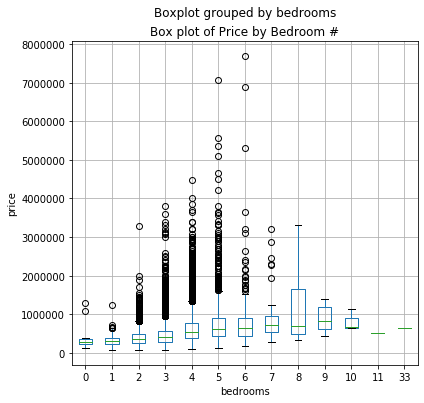

In [7]:
# Create boxplot of price by bedrooms
# bedrooms
bxplt1 = plt.figure(figsize = (6, 6))

# Define axis
ax1 = bxplt1.gca()

# Place data on the axis
housedata.loc[:,['bedrooms', 'price']].boxplot(by = 'bedrooms', ax = ax1)
ax1.set_title('Box plot of Price by Bedroom #')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

#### What can we learn from the boxplot?

While the above boxplot informs us on price according to bedroom, it is also a good check of our summary statistics. At first glance the scale on the y axis seems a bit extreme (house prices at almost 8 million dollars - wow!), but if we go back to our summary statistics we can see that this is infact the case. However, as indicated by our IQRs for each bedroom number, most homes are under 2 million dollars. The home prices that have the most spread are the 5 and 6 bedroom homes. A possibly good business insight that can be drawn from this is that 5/6 bedrooms home prices can vary widely and it may encourage the investor to build these types of homes and be prepared if the market drops or increases, there is possibly more fleibility for selling price.

In terms of our model, knowing the amount of spread is important to keep in mind because it may suggest that number of bedrooms is not always an indicator of price.

Text(0.5, 0, 'House price')

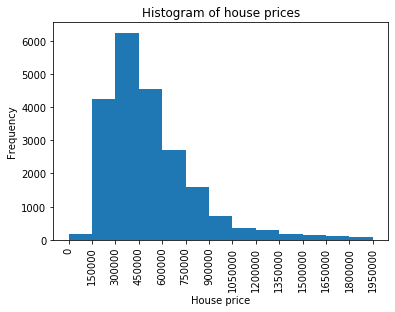

In [8]:
# Prices by frequency

# Create boolean array of houses that are under 2 million (the typical)
typicalprice = housedata.loc[:,'price'] < 2000000

# Check data
typicalprice.head()

# Create df of only these houses
typicalprice1 = housedata[typicalprice]
typicalprice1.head()

# Create histogram with new df
typicalprice1.loc[:,'price'].plot.hist(bins = np.arange(0, 2000000,150000))
plt.xticks(np.arange(0, 2000000, 150000), rotation = 90)
plt.title('Histogram of house prices')
plt.xlabel('House price')

#### What can we learn from the histogram?

Before creating the histogram, homes over 2 million dollars were removed. As seen in our boxplot, the majority of our houses are under this price. If we were to create a histogram with these higher end prices, the histogram would be very long and not yield very much helpful information. By removing those outliers we are able to clearly see that most homes are between 300,000 dollars and 450,000 dollars. It seems these home price may take the shape of a normal distribution. Let's do some tests to see if they are normally distributed.

## Identify a likely distribution for several of the housing features

In [9]:
# Price
print(stats.normaltest(housedata.price))

# Price of more typical houses
print(stats.normaltest(typicalprice1.price))

NormaltestResult(statistic=19121.788941861127, pvalue=0.0)
NormaltestResult(statistic=7483.159001932461, pvalue=0.0)


#### What can we learn from this normality test?
When initially doing a test for normality on the all houses in the dataset, we can see that there is no normality. This can possibly make sense, as we have those few outlier homes that cost a lot of money. As a next step, we condutced the test without those homes. Even with deleting outliers, our price featuredoes not appear to be normally distributed.

NormaltestResult(statistic=3782.1057479274455, pvalue=0.0)
AxesSubplot(0.125,0.125;0.775x0.755)


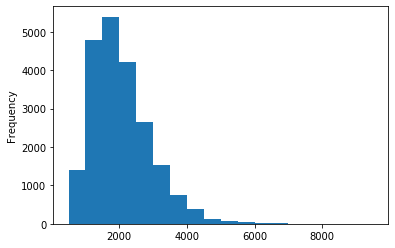

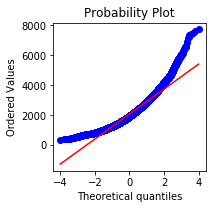

In [10]:
# Square foot living
# Check data/normal test
print(stats.normaltest(typicalprice1.loc[:,'sqft_living']))
min(typicalprice1.loc[:,'sqft_living'])
max(typicalprice1.loc[:,'sqft_living'])
print(typicalprice1.loc[:,'sqft_living'].plot.hist(bins = np.arange(500, 10000,500)))

# QQ plot
# Normal test visualization
def qq_plot(vec1):
    
    #define axis
    plt.figure(figsize=(6, 6)).gca()
    
    #set up plot
    ax1 = plt.subplot(221) ## setup the left subplot
    
    #plot
    ss.probplot(vec1, plot = ax1)
    
# Generate qq plot of square foot living space data
qq_plot(typicalprice1.loc[:,'sqft_living'])

#### What can these normal tests/visualizations tell us about square foot living space?
While the histogram appears to almost be normal, skewing to the right with most of the data on the left, the statistical test tells us that the data are not normally distributed. To visualize this we use a QQ plot, we see once again that the data are not on the line of normality. This information is helpful for possible real estate agents or investors because it implies that only houses around 2000 square feet are in this area, and that is more likely what buyers will expect to see and pay for (also notice we are only working with houses that are under two million, removing the outliers from these analyses). It would be interesting to see if the entirety of a location (i.e. the whole lot, not just living spaces) maintains a similar distribution.

NormaltestResult(statistic=38625.53783847835, pvalue=0.0)
AxesSubplot(0.125,0.125;0.775x0.755)


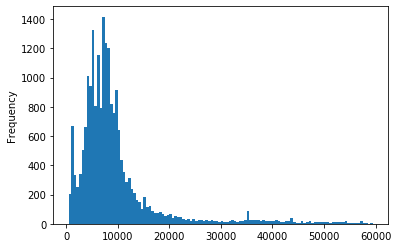

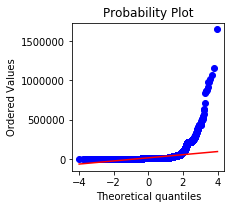

In [11]:
# square foot lot normality
# Check data/normality test
print(stats.normaltest(typicalprice1.loc[:,'sqft_lot']))
min(typicalprice1.loc[:,'sqft_lot'])
max(typicalprice1.loc[:,'sqft_lot'])
print(typicalprice1.loc[:,'sqft_lot'].plot.hist(bins = np.arange(500, 60000,500)))

# Generate qq plot of sqft lot data
qq_plot(typicalprice1.loc[:,'sqft_lot'])

#### What can these normality tests/visualizations tel us about lot size
Wow! Some of these lots are huge. This is really valuable information. Stepping back a little bit, we can see that the average home is about 2000 square feet, while the average lot size is about 7000 sqaure feet. This means that people in this area tend to like huge backyards/lots attached to their homes. This is a very relevant insight for a real estate team or buyer, as it implies people in this area will expect to have land come with there home. Thus, if you are thinking of buying in the area and hope to resell, it is almost a must to have the home be on a lot of about 5000 square feet. Interestingly, the qq plot implies that the distribution of lots may have been normal, if not for those home with more than 20000 square feet lots.

## Compute basic summary statistics by both classical, bootstrap, and bayesian methods
*see above for classical methods

### Bootstrap

Bootstrapped means of price = (519070.377)
Actual mean of price = (518936.581)


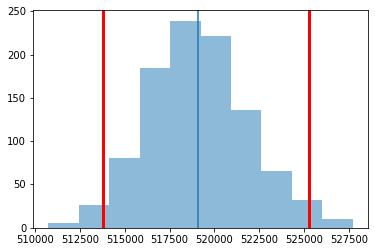

In [12]:
## Bootstrap the means of the home prices
pricecol = typicalprice1.price

# Establish how many bootstrap samples will be using
n_replicas = 1000

# Bootstrap the means of price
price_bootstrap_means = pd.Series([
    pricecol.sample(frac = .5, replace = True).mean()
    for i in range(n_replicas)
])

# Create function to plot bootstrap sample means
def plot_hist(x, p = 5):
    
    # plot the distribution and mark the mean
    plt.hist(x, alpha = .5)
    plt.axvline(x.mean())
    
    # mark the 95% ci
    plt.axvline(np.percentile(x, p/2.), color = 'red', linewidth = 3)
    plt.axvline(np.percentile(x, 100 - p/2.), color = 'red', linewidth = 3)

# Plot bootstrapped price means
plot_hist(price_bootstrap_means)
pbs_mean = price_bootstrap_means.mean()

# Print out stats
print('Bootstrapped means of price = (%.3f)' % (price_bootstrap_means.mean()))
print('Actual mean of price = (%.3f)' % (pricecol.mean()))

#### What can we learn from these bootstrapped means?
Initially when creating this summary statistic I chose to sample the equivalent of the entirety of the sample (i.e. frac = 1). However, after looking at the histogram I realized this wasn't too informative. Instead, I decided to sample the equivalent of half of the homes prices (i.e. frac = .5). While the bootstrapped mean of the price is farther (only slightly) than it was for a larger number of samples, it's still prety close. This helps us inform on the housing data because it implies that if we want to grow out into another area of Washington, we can perform a bootstrap analysis on a more rescricted number of homes (maybe for budgetary reasons) and get an idea of what the typical price is.

### Bayesian

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mean of all prices = 646849.9


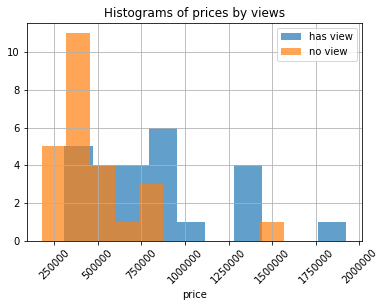

In [13]:
# Subsample housing data with 25 observations
num_sample = 25

# Create column with view information
typicalprice2 = typicalprice1
typicalprice2['isviews'] = np.where(typicalprice2.view > 0, 1, 0)


# Create subsets
view = typicalprice2[typicalprice2.loc[:, 'isviews'] == 1].sample(n = num_sample)
noview = typicalprice2[typicalprice2.loc[:, 'isviews'] == 0].sample(n = num_sample)

# Plot sample
plt.title('Histograms of prices by views')
view.price.hist(label = 'has view', bins = 10, alpha = .7)
noview.price.hist(label = 'no view', bins = 10, alpha = .7)
plt.xlabel('price')
plt.xticks(rotation = 45)
plt.legend()

mean_price = np.concatenate([view.price, noview.price]).mean()
print('Mean of all prices =', mean_price)

Mean = 813800.000, Standard Deviation = 383904.051


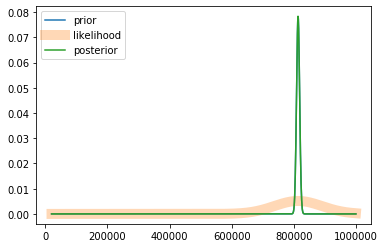

In [14]:
# Estimate the posterior distribution of the mean
N = 1000
p = np.linspace(20000, 1000000, num = N)

pp = ss.norm.pdf(p, loc = view.price.mean(), scale = 5000)
pp = pp / pp.sum()

def comp_like(p, x):
    variance = np.std(x)**2
    x_mean = np.asarray(x).mean()
    print('Mean = %.3f, Standard Deviation = %.3f' % (x_mean, np.std(x)))
    n = len (x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l/l.sum()

# Make function to find posterior
def posterior(prior, like):
    
    # Multiply the probabilities
    post = prior * like
    
    # Normalize the distribution
    return post/sum(post)

like_view = comp_like(p, view.price)
post_view = posterior(pp, like_view)

# Plot results
plt.plot(p, pp, label='prior')
plt.plot(p, like_view, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_view, label='posterior')
plt.legend()

Mean = 479899.800, Standard Deviation = 272541.857


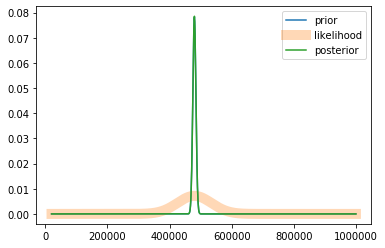

In [15]:
# Do same for prices of no views
pp_noview = ss.norm.pdf(p, loc = noview.price.mean(), scale = 5000)
pp_noview = pp_noview / pp_noview.sum()

like_noview = comp_like(p, noview.price)
post_noview = posterior(pp_noview, like_noview)

plt.plot(p, pp_noview, label='prior')
plt.plot(p, like_noview, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_noview, label='posterior')
plt.legend()

#### What can we learn about these Bayesian summary statistics?
By estimating the posterior distribution of the mean for both homes with and without views we can see that the highest relative likelihood for homes with views is around a price of about 700000. When looking at the homes without views, we can see that the likelihood is more robust, but is happening around 400000. These posterior distributions help us to see what the most liklely of price will be for our respective groups (i.e. homes with/without views).

## Compute confidence intervals for the above statistics by classical, bootstrap, and Bayesian methods

### Classic

In [16]:
# Compute confidence intervals for housing prices

# Compute summary statistics
# Compute sample estimated population stats
pricecol_means = np.array([
    np.random.choice(pricecol, size = 50, replace = True).mean()
    for i in range(500)
])

price_pop_mean = pricecol_means.mean()
price_pop_std = pricecol_means.std()

# Set alpha
alpha = 0.95

# Define margin of error
half_width = ss.norm.ppf((1 + alpha) / 2, loc = price_pop_mean, scale = price_pop_std)

# Set limits for confidence intervals
ci_low = price_pop_mean - half_width
ci_high = price_pop_mean + half_width

# Print info
print('The actual mean is %.2f' %pricecol.mean())
print('The %.2f level CI is (%.2f, %.2f)' % (alpha, ci_low, ci_high))

The actual mean is 518936.58
The 0.95 level CI is (-80003.28, 1124591.25)


#### What can we learn from these confidence intervals?
By calculating the confidence intervals with the above parameters, we can be 95% certain that the values between our confidence intervals contains the true mean of the population. We are ble to confirm this by looking at the actual mean of the housing prices and seeing it falls within those intervals. 

### Bootstrap

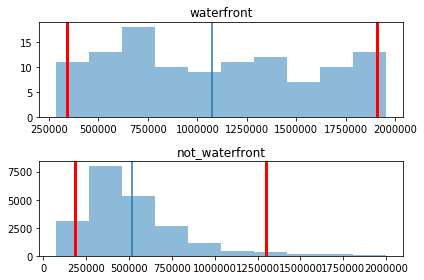

In [17]:
# Create new df to work with
typicalprice2 = typicalprice1

# Select subset of rows
waterfront = typicalprice2[typicalprice2.loc[:, 'waterfront'] == 1]
not_waterfront = typicalprice2[typicalprice2.loc[:,'waterfront'] == 0]

# Make function to plot both
def plot_dists(a, b, nbins, a_label = 'pop_A', b_label = 'pop_B', p = 5):
        # Create visualization consistency
    combined = pd.concat([a,b])
    breaks = np.linspace(
        combined.min(),
        combined.max(),
        num = nbins + 1)
    
    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()

plot_dists(waterfront.price, not_waterfront.price, 20, a_label = 'waterfront', b_label = 'not_waterfront')

#### What can we learn from these confidence intervals
WIthin this analysis, we are not only able to see confidence intervals on our pricing data, but we are able to see it broken down by water front and not water front properties. Our confidecen intervals show where the true mean of the population likely lies within. We can see that the non-waterfront home distribution lies within the confidence intervals for the waterfront home prices. This means we cannot say that pricing for waterfront and non-waterfront homes are significantly different in their pricing range. This is valuable information for anyone looking to buy in the area, as it show that while there may be amore limited amount of waterfront homes in the area, it's possible their pricing can be very affordable. By visualizing the large spread of pricing for the waterfront homes, we can also suggest that if someone was looking to "flip" a house, they could likely buy a waterfront home, fix it up, and have a good chance of ending up in that higher selling range that waterfront homes can go for.

### Bayesian

The 0.950 credible interval is 0.025 to 0.975


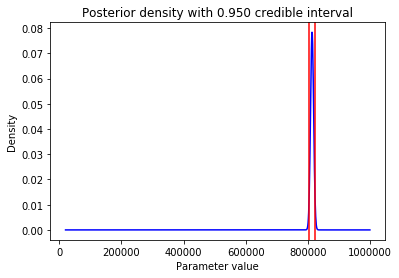

In [18]:
# Establish number of samples
num_samples = 10000

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

# Plot homes with views
plot_ci(p, post_view, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


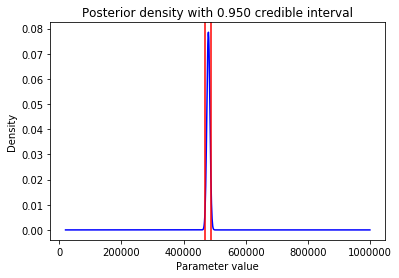

In [19]:
# Plot homes with no views
plot_ci(p, post_noview, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975
The 0.950 credible interval is 0.025 to 0.975


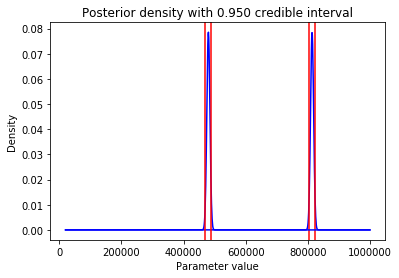

In [20]:
# Plot both groups on same axis
plot_ci(p, post_view, num_samples, lower_q=.025, upper_q=.975)
plot_ci(p, post_noview, num_samples, lower_q=.025, upper_q=.975)

#### What can we learn from these credible intervals?
By not only plotting the credible intervals for a population, but doing so on the same axis, we are able to see that they do not overlap between groups. This means that the differences between the two groups is significant. This reiterates previous findings that demonstrate homes with views are more expensive than homes without views.

## Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant
*see above for bayesian methods

### Classical

DegFreedom    3.481745e+01
Difference    6.668250e+05
Statistic     6.183537e+00
PValue        4.522999e-07
Low95CI       4.478596e+05
High95CI      8.857904e+05
dtype: float64


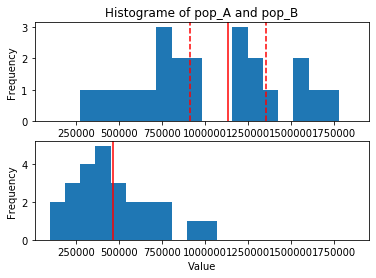

In [21]:
# Test to see if prices in waterfront and non-waterfront homes are significantly different

# Create histogram function
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
# Create function for t-test
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)  

# Create subsets
waterfront = typicalprice2[typicalprice2.loc[:, 'waterfront'] == 1].sample(n = num_sample)
nowaterfront = typicalprice2[typicalprice2.loc[:, 'waterfront'] == 0].sample(n = num_sample)

# Set alpha equal to .05/create variable with this information
pricettest = t_test(waterfront.price, nowaterfront.price, 0.05)

# Create function for delineating confidence intervals
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

# Create function to plot t-test data
def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

print(pricettest)
plot_t(waterfront.price, nowaterfront.price, pricettest)

DegFreedom    3.481745e+01
Difference    6.668250e+05
Statistic     6.183537e+00
PValue        4.522999e-07
Low95CI       4.478596e+05
High95CI      8.857904e+05
dtype: float64


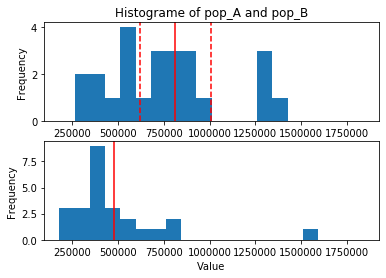

In [22]:
# Do again for view versus no view homes
pricettest2 = t_test(view.price, noview.price, 0.05)
print(pricettest)

# Plot data with confidence intervals
plot_t(view.price, noview.price, pricettest2)

#### What can we learn from the above t-tests?
By investigating the diffferences in multiple groups of data, we can begin to see how they may be related. When observing the first set of plot about waterfront versus non-waterfront homes we can see that the mean of non-waterfront homes does not fall within the confidence intervals for the waterfront homes. This means there is a significant difference between the two. When we look at the second set of graphs we see a similar pattern for homes with/without views. Interestingly, the distribution for homes with no waterfront view and no view at all seems to be very similar. Meanwhile, the view homes maintain a wider spread than the waterfront homes, with more data points accumulating on the lower price end. These results suggest that homes that are considered to have views that are not waterfront, are likley to be cheaper on the market than homes with a waterfront view. Therefore, someone looking to buy and resell in the area may want to reconsider buying a home advertised as having a 'view' if it is not a waterfront one.

### Bootstrap methods
After seeing the similarities between the waterfront and view groups I was curious if there truly is a difference in means between them. The similar distributions between the two implies that those that have a view and those who have a waterfront property are mostly one in the same, although the source of the data does not explicitly say. ALthough there are other statistical tests we can do, a good first exploratory step in comparing these two groups is investigating the differences in means.

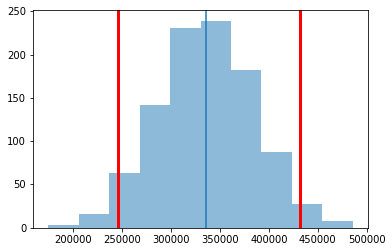

In [23]:
## Calculate the differences in means using bootstrap methods

diffs = []
for i in range(n_replicas):
    sample = typicalprice2.sample(frac=1.0, replace=True)
    view_sample_mean = sample[sample.loc[:,'view'] == 1].price.mean()
    waterfront_sample_mean = sample[sample.loc[:,'waterfront'] == 1].price.mean()
    diffs.append(waterfront_sample_mean - view_sample_mean)
diffs = pd.Series(diffs)


plot_hist(diffs)

#### What can we learn from this bootstrap visualization?
Interestly, the means *are* significantly different! My hunch was incorrect. Although this does not mean these two groups come from mutually exclusive populations, it does mean that even if they do, the amount of homes with views are different enough in price to be significant. This is relevant information for anyone looking to buy or sell a home in the area because it demonstrates that even if your home has a great view, if it's not waterfront, you're unlikely to sell at the top of the market.

# Overall interpretation
The above analyses results in insights that can help inform decisions on home buying and reselling in King County, Washington. We learned that while there may be fewer homes with a waterfront view, these maintain the possibility of having a very high selling price. We also learned that peopel in King County may expect to have land, or at the very least a large lot as part of their property. It would be smart to stay away from homes or refurbishments that would put the value of the home over 2 million dollars, as that would be high for this area and buyers are unliklely to pay in this market.